In [2]:
import os
import pathlib
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Import the data 

In [3]:
# checking directory as well counting content
L = 0
for dirpath, dirnames, filenames in os.walk("./Dataset_A"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")
    L = L + len(filenames)

There are 2 directories and 0 images in './Dataset_A'
There are 0 directories and 196 images in './Dataset_A\Covid'
There are 0 directories and 196 images in './Dataset_A\Normal'


In [4]:
data_dir = pathlib.Path("./Dataset_A/") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Covid' 'Normal']


# Functions for Preprocessing

Image example shape: (980, 1024, 3)


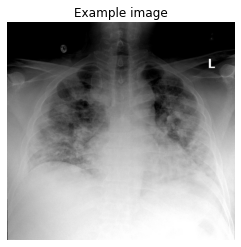

In [5]:
EXAMPLE_IMG_PATH = "./Dataset_A/Covid/2edb88df42cab5e5fbc18b3965e0bd_jumbo.jpeg"
img1 = cv2.imread(EXAMPLE_IMG_PATH)
print(f"Image example shape: {img1.shape}")
plt.imshow(img1)
plt.title("Example image")
plt.axis("off")
plt.show()

In [6]:
# Grayscale
def rgb2gray(rgb_img):
    output_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)
    return output_img

In [7]:
# Scale to 0 to 1
def scale(image):
    return image / 255

In [8]:
#resize
def resize_img(image, rows=224, cols=224):
    return cv2.resize(image, dsize=(rows, cols), interpolation=cv2.INTER_CUBIC)

In [9]:
# resize the shape
def reshape(image, axis):
    return np.expand_dims(image.mean(axis=axis), axis=1)

In [10]:
# Function to call other Preprocessing Functions
def preprocessed_img(input_img):
    output_img = rgb2gray(input_img)
    output_img = scale(output_img)
    output_img = resize_img(output_img)
    output_img = reshape(output_img, 1)
    return output_img

In [11]:
# Image converted in array
preprocessed_img(img1)

array([[0.0643455 ],
       [0.06581957],
       [0.06364914],
       [0.06145989],
       [0.06096333],
       [0.06030856],
       [0.05783198],
       [0.05545986],
       [0.05408482],
       [0.05439635],
       [0.05236153],
       [0.05039982],
       [0.04854758],
       [0.0474203 ],
       [0.04607254],
       [0.04469704],
       [0.04400605],
       [0.04354177],
       [0.03991033],
       [0.03829336],
       [0.03753671],
       [0.03759613],
       [0.03807784],
       [0.03832515],
       [0.04146809],
       [0.0380457 ],
       [0.0395027 ],
       [0.0397272 ],
       [0.04451049],
       [0.04891156],
       [0.04988278],
       [0.04833086],
       [0.04806037],
       [0.05513515],
       [0.06359267],
       [0.06996926],
       [0.07145016],
       [0.07737733],
       [0.10655243],
       [0.12163204],
       [0.13732324],
       [0.15620719],
       [0.16759895],
       [0.17811291],
       [0.19463181],
       [0.2018397 ],
       [0.21721973],
       [0.199

# Processing the whole dataset

In [12]:
# matrix containing L vectors of shape (224, 1)
mean_vector_matrix = np.zeros(shape=(L, 224, 1))
# Target vector containing the classes for L images
target_vector = np.zeros(shape=(L, 1))

In [13]:
# fill the matrix with normal class images. Class "1"
n = 0
for root, dirnames, filenames in os.walk("./Dataset_A/Normal"):
    n_total = len(filenames)
    for filename in filenames:
        file_path = os.path.join(root, filename)
        img = cv2.imread(file_path)
        img = preprocessed_img(img)
        mean_vector_matrix[n] = img
        target_vector[n] = 1
        if n % 20 == 0:
            print(f"File {n} {filename}")
        n = n + 1  

File 0 IM-0125-0001.jpeg
File 20 IM-0431-0001.jpeg
File 40 IM-0523-0001.jpeg
File 60 IM-0651-0001.jpeg
File 80 NORMAL2-IM-0415-0001.jpeg
File 100 NORMAL2-IM-0642-0001.jpeg
File 120 NORMAL2-IM-0854-0001.jpeg
File 140 NORMAL2-IM-1001-0001.jpeg
File 160 NORMAL2-IM-1134-0001.jpeg
File 180 NORMAL2-IM-1260-0001.jpeg


In [14]:
# fill the matrix with covid class images. Class "0"
for root, dirnames, filenames in os.walk("./Dataset_A/Covid"):
    n_total = len(filenames)
    for filename in filenames:
        file_path = os.path.join(root, filename)
        img = cv2.imread(file_path)
        img = preprocessed_img(img)
        mean_vector_matrix[n] = img
        target_vector[n] = 0
        if n % 20 == 0:
            print(f"File {n} {filename}")
        n = n + 1 

File 200 1-s2.0-S1684118220300608-main.pdf-001.jpg
File 220 10.1016-slash-j.crad.2020.04.002-b.png
File 240 16865_1_1.jpg
File 260 41591_2020_819_Fig1_HTML.webp-day10.png
File 280 82a78c13.jpg
File 300 auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
File 320 covid-19-caso-95-3-14.png
File 340 covid-19-pneumonia-rapidly-progressive-12-hours.jpg
File 360 f8335316.jpg
File 380 ryct.2020003.fig2-a.png


# Train Test split

In [15]:
SEED = 0
x_train, x_test, y_train, y_test = train_test_split(mean_vector_matrix, target_vector, test_size=0.2, random_state=SEED)
tf.random.set_seed(SEED)
np.random.seed(SEED)
input_shape = x_train.shape
input_shape

(313, 224, 1)

In [16]:
model = tf.keras.Sequential([
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(units=64, activation='softmax', input_shape = input_shape),
   tf.keras.layers.Dense(units=64, activation='softmax', input_shape = input_shape),
   tf.keras.layers.Dense(units=64, activation='softmax', input_shape = input_shape),
   tf.keras.layers.Dense(units=2, activation='softmax')
])

In [17]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer = 'adam',
  metrics = ['accuracy']
)

In [18]:
history = model.fit(
  x = x_train,
  y = y_train,
  epochs = 100
)

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4888
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4856
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5112
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5112
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5112
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5112
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5112
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5112
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5112
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5112
Epoch 11/

3/3 - 0s - loss: 0.2516 - accuracy: 0.9747 - 111ms/epoch - 37ms/step


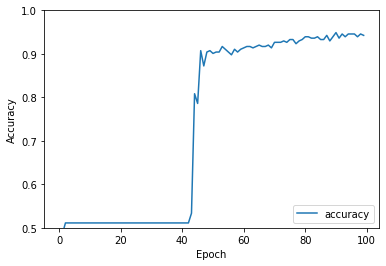

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)